In [2]:
import json

with open('/content/fexEx.json', 'r') as f:
    data = json.load(f)

print(data)

[{'task_id': 'HumanEval/1', 'prompt': 'from typing import List\n\n\ndef separate_paren_groups(paren_string: str) -> List[str]:\n    """ Input to this function is a string containing multiple groups of nested parentheses. Your goal is to\n    separate those group into separate strings and return the list of those.\n    Separate groups are balanced (each open brace is properly closed) and not nested within each other\n    Ignore any spaces in the input string.\n    >>> separate_paren_groups(\'( ) (( )) (( )( ))\')\n    [\'()\', \'(())\', \'(()())\']\n    """\n', 'entry_point': 'separate_paren_groups', 'canonical_solution': "    result = []\n    current_string = []\n    current_depth = 0\n\n    for c in paren_string:\n        if c == '(':\n            current_depth += 1\n            current_string.append(c)\n        elif c == ')':\n            current_depth -= 1\n            current_string.append(c)\n\n            if current_depth == 0:\n                result.append(''.join(current_strin

In [3]:
!pip install -q groq
from groq import Groq
from google.colab import userdata
gr = userdata.get('groq')
client = Groq(api_key=gr)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 3.4 MB/s eta 0:00:00


In [4]:
def run_tests(candidate_function):
    """
    Correctly runs the HumanEval test string against a candidate function.
    """
    test_string = data[6]['test']
    # This scope will hold the functions defined in the test_string
    exec_scope = {}

    try:
        # 1. Execute the test string. This defines the 'check' function
        #    within exec_scope.
        exec(test_string, {}, exec_scope)

        # 2. Retrieve the 'check' function from the scope
        check_function = exec_scope['check']

        # 3. Now, CALL the 'check' function with our candidate.
        #    This is where the asserts are actually run.
        check_function(candidate_function)

        print("✅ All test cases passed!")

    except AssertionError as e:
        # This will catch failures from the assert statements inside 'check'
        print(f"❌ Test case failed: {e}")
    except Exception as e:
        print(f"💥 An error occurred during testing: {e}")

#Qwen

##Qwen COT

In [5]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given coding problem step by step.

Follow this exact output structure:

**APPROACH:**
1.  **Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
2.  **Analyze the examples:** (Break down the provided examples to understand edge cases).
3.  **Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
4.  **Implement the solutions:** (Write the code for the three algorithms).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[6]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    reasoning_effort="none",
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**APPROACH:**

1. **Understand the requirements:**  
   The task is to filter a list of strings and retain only those that contain a given substring. The function takes two inputs: a list of strings `strings` and a string `substring`. The function should return a new list containing only the strings that include `substring`.

2. **Analyze the examples:**  
   - In the first example, an empty list is returned because the input list is empty.
   - In the second example, strings like `'abc'`, `'bacd'`, and `'array'` include the substring `'a'` and are included in the output, while `'cde'` is omitted.

3. **Plan the algorithms:**  
   - **Algorithm 1:** Use list comprehension and Python's built-in `in` operator to filter the input list.
   - **Algorithm 2:** Use a simple `for` loop and `in` operator to manually build the result list.
   - **Algorithm 3:** Use Python's `filter()` function and a lambda to filter the strings that include the substring.

---

**--- PLAN ---**
- These three app

Code 1

In [6]:
from typing import List

def test1(strings: List[str], substring: str) -> List[str]:
    """Filter strings containing the given substring using list comprehension."""
    return [s for s in strings if substring in s]

In [7]:
run_tests(test1)

✅ All test cases passed!


Code 2

In [8]:
def test2(strings: List[str], substring: str) -> List[str]:
    """Filter strings containing the given substring using a for loop."""
    result = []
    for s in strings:
        if substring in s:
            result.append(s)
    return result

In [9]:
run_tests(test2)

✅ All test cases passed!


Code 3

In [10]:
from typing import List

def test3(strings: List[str], substring: str) -> List[str]:
    """Filter strings containing the given substring using filter() and lambda."""
    return list(filter(lambda s: substring in s, strings))

In [11]:
run_tests(test3)

✅ All test cases passed!


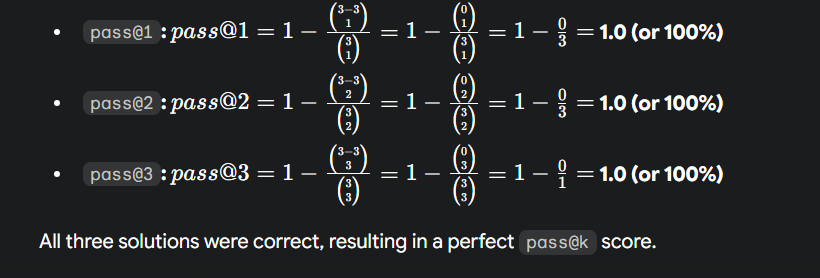

Qwen on Stepwise COT

In [12]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given problem systematically.

Follow this exact output structure:

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
* **Step 2: Analyze the examples:** (Break down the docstring examples to find edge cases).
* **Step 3: Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
* **Step 4: Implement the solutions:** (Provide the final code for all three algorithms below).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[6]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    reasoning_effort="none",
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**SYSTEMATIC APPROACH:**

* **Step 1: Understand the requirements:**
   - We are given a list of strings and a substring.
   - The task is to filter and return only those strings from the list that contain the substring.
   - The function must be type-annotated with `List[str]` and must match the provided signature.
   - Edge cases to consider: an empty list, strings that contain the substring in different locations (start, middle, end).

* **Step 2: Analyze the examples:**
   - From the first example, the output for an empty input is simply an empty list.
   - From the second example, the filter returns all strings that contain the substring `'a'`.

* **Step 3: Plan the algorithms:**
   1. **Filter with `filter()` and lambda:** Use Python's built-in `filter()` with a lambda function that checks if a string contains the substring.
   2. **List comprehension:** Use a single list comprehension for filtering.
   3. **For loop manual filtering:** Build a new list by manually checking each 

In [13]:
def test1(strings: List[str], substring: str) -> List[str]:
    # Using filter() and lambda function for filtering
    return list(filter(lambda s: substring in s, strings))

In [14]:
run_tests(test1)

✅ All test cases passed!


In [15]:
def test2(strings: List[str], substring: str) -> List[str]:
    # Using list comprehension for filtering
    return [s for s in strings if substring in s]

In [16]:
run_tests(test2)

✅ All test cases passed!


In [17]:
def test3(strings: List[str], substring: str) -> List[str]:
    # Manually iterating through list and building result
    result = []
    for s in strings:
        if substring in s:
            result.append(s)
    return result

In [18]:
run_tests(test3)

✅ All test cases passed!


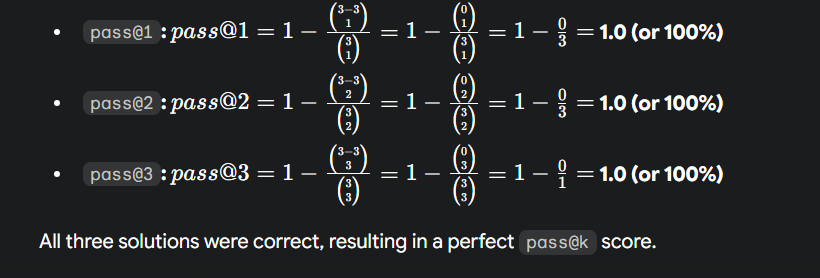

#Llama

##Llama COT

In [19]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given coding problem step by step.

Follow this exact output structure:

**APPROACH:**
1.  **Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
2.  **Analyze the examples:** (Break down the provided examples to understand edge cases).
3.  **Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
4.  **Implement the solutions:** (Write the code for the three algorithms).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[6]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**APPROACH:**
1.  **Understand the requirements:** The function `filter_by_substring` takes two parameters: a list of strings `strings` and a substring `substring`. It returns a new list containing only the strings from `strings` that have the `substring` inside them.
2.  **Analyze the examples:** In the first example, an empty list is passed, and the function should return an empty list. In the second example, it's demonstrated that the function correctly filters strings containing a specified substring 'a'.
3.  **Plan the algorithms:** Here are three distinct algorithms to solve this problem:

    Algorithm 1: Iterative Approach - Iterate over each string in the list and check if the substring is present in the string.

    Algorithm 2: Filtering List using List comprehension with String In Operator - Utilize the built-in `in` operator in Python strings, which returns `True` if a substring is found within the string.

    Algorithm 3: Set Intersection - Convert the list of strings to

Code 1

In [20]:
def test1(strings: List[str], substring: str) -> List[str]:
    """ Filter an input list of strings only for ones that contain given substring"""
    result = []
    for string in strings:
        if substring in string:
            result.append(string)
    return result

In [21]:
run_tests(test1)

✅ All test cases passed!


Code 2

In [22]:
def test2(strings: List[str], substring: str) -> List[str]:
    """ Filter an input list of strings only for ones that contain given substring"""
    return [string for string in strings if substring in string]

In [23]:
run_tests(test2)

✅ All test cases passed!


Code 3

In [24]:
from typing import List

def test3(strings: List[str], substring: str) -> List[str]:
    """ Filter an input list of strings only for ones that contain given substring"""
    frozenset_substring = frozenset(substring)
    return [string for string in strings if frozenset(string) & frozenset_substring]


In [25]:
run_tests(test3)

❌ Test case failed: 


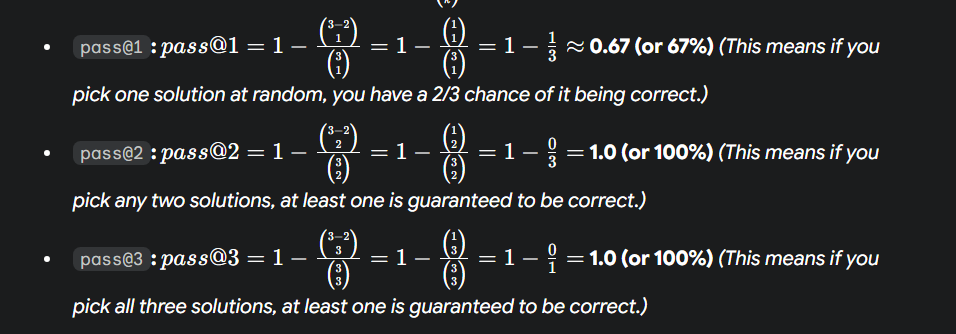

LLama on Stepwise COT

In [26]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given problem systematically.

Follow this exact output structure:

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
* **Step 2: Analyze the examples:** (Break down the docstring examples to find edge cases).
* **Step 3: Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
* **Step 4: Implement the solutions:** (Provide the final code for all three algorithms below).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[6]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** 
  - The function `filter_by_substring` takes two parameters: `strings` and `substring`.
  - `strings` is a list of strings, and `substring` is a string to be searched.
  - The function should return a new list containing only the strings from `strings` that contain `substring`.
  - If `substring` is not found in any string, an empty list should be returned.
  - The examples show the function works with an empty list, and a list containing strings with and without the substring.

* **Step 2: Analyze the examples:**
  - The first example shows an empty input list should return an empty list.
  - The second example shows a list with strings containing the substring should return those strings.
  - The second example also shows a list with strings not containing the substring should return an empty list.

* **Step 3: Plan the algorithms:**
  1. Using the `filter()` function and a lambda expression: This approach will use 

In [27]:
def test1(strings: List[str], substring: str) -> List[str]:
    """
    Filter an input list of strings only for ones that contain given substring
    >>> test1([], 'a')
    []
    >>> test1(['abc', 'bacd', 'cde', 'array'], 'a')
    ['abc', 'bacd', 'array']
    """
    return list(filter(lambda s: substring in s, strings))

In [28]:
run_tests(test1)

✅ All test cases passed!


In [29]:
def test2(strings: List[str], substring: str) -> List[str]:
    """
    Filter an input list of strings only for ones that contain given substring
    >>> test2([], 'a')
    []
    >>> test2(['abc', 'bacd', 'cde', 'array'], 'a')
    ['abc', 'bacd', 'array']
    """
    return [s for s in strings if substring in s]

In [30]:
run_tests(test2)

✅ All test cases passed!


In [31]:
def test3(strings: List[str], substring: str) -> List[str]:
    """
    Filter an input list of strings only for ones that contain given substring
    >>> test3([], 'a')
    []
    >>> test3(['abc', 'bacd', 'cde', 'array'], 'a')
    ['abc', 'bacd', 'array']
    """
    result = []
    for s in strings:
        if substring in s:
            result.append(s)
    return result

In [32]:
run_tests(test3)

✅ All test cases passed!


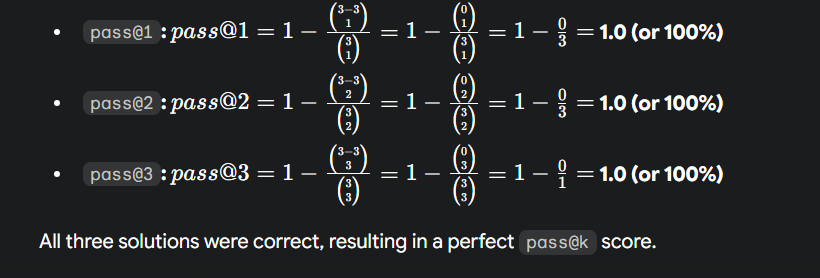